

# Project: Tmbd Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


     In this project we will be analysing the movie database(TMDb) which contains over 10,000 movie data rleased between the years 1960 to 2015. The Dataset contains 21 columns which includes the id, imdb_id, genres of movie, budget and revenue and its adjusted columns in terms of 2010 dollars, popularity, vote count and many other columns. 
     
    I would like  to see the trends in budget, revenue and popularity over the years. Maybe find the change in genres and spot production companies that have been successful with their movie releases.
    
    In this project i would be checking for the years that produced the most movies and how much profit was made. Also i would like to know if popularity of the movie affects the vote count.
   


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bf0536ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4bf5977358>]], dtype=object)

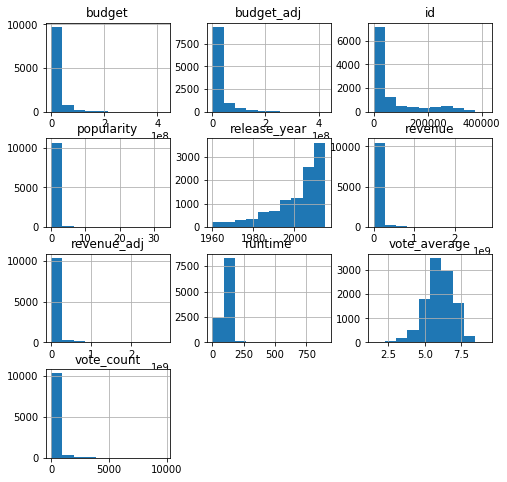

In [28]:
print(df.describe())
df.hist(figsize=(8,8))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [30]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

notice how columns like keywords, tagline and homepage have a lot of missing values. i will be dropping these columns as they are not needed. i will be working mostly with the quantitative data in this dataset.

In [31]:
no_pc_df=df[df['production_companies'].isnull()]
no_pc_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
370,318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
374,206197,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,http://www.thesisterhoodofnight-movie.com/,Caryn Waechter,The Salem Witch Trials remixed.,...,When a teenage girl says she's the victim of a...,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
382,306197,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,NaN,Kris Swanberg,No one is ever really prepared.,...,An inner-city high school teacher discovers sh...,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
388,323967,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,NaN,Anna Mastro,Heaven or hell. It's in his hands.,...,A ticket-taker at the local cinema believes he...,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00
393,343284,tt3602128,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,NaN,Kyle Rankin,NaN,...,After a one night stand Deb wakes up in the mi...,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015,1.839999e+06,0.000000e+00


I moved rows with no production companies into a new dataframe for further inspection later before i start cleaning the data.
Notice that budget and revenue columns are mostly zero and this could just be a general oversight in the data collection. As such i will be dropping the production companies column with null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bf63ce278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4bf62439e8>]], dtype=object)

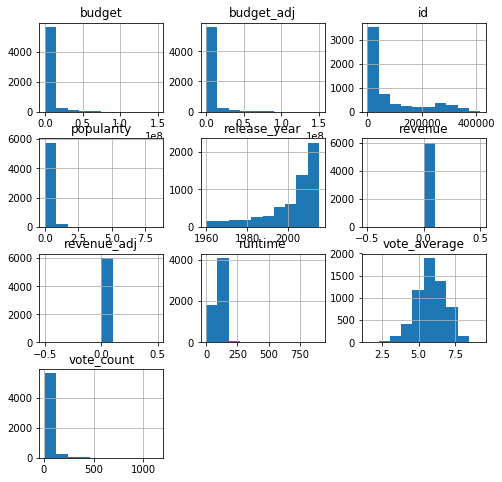

In [32]:
df[df.revenue==0].hist(figsize=(8,8))

<a id='wrangling'></a>
## Data Wrangling and Cleaning

### General Properties
The dataset has 10866 rows and 21 columns. It contains one duplicate row, columns with null values and colums like budget with many zero values.

checked for duplicates and dropped it


In [33]:
print(df.duplicated().sum())
df[df.duplicated()]
df.drop_duplicates(inplace=True)


1


dropped columns i won't be analysing.

In [34]:
blah=['homepage', 'tagline','overview','keywords', 'cast','genres','production_companies']
df.drop(blah, axis=1, inplace=True)
print(df.shape)
df.isnull().sum()


(10865, 14)


id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

checked for number of rows with zero budget,revenue and their adjusted columns.
*replaced zero with the average of these columns.

In [35]:
money_col=['budget','revenue','budget_adj','revenue_adj', 'runtime']
for col in money_col:
    print(df[df[col]==0].shape)
    col_avg = df[col].mean()
    df[col].replace(0, col_avg, inplace=True)
df[df['revenue']==0].shape

(5696, 14)
(6016, 14)
(5696, 14)
(6016, 14)
(31, 14)


(0, 14)

In [36]:
df.dropna(how='any', inplace=True)
print(df.shape)
df.isna().sum()
df.info()

(10815, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10865
Data columns (total 14 columns):
id                10815 non-null int64
imdb_id           10815 non-null object
popularity        10815 non-null float64
budget            10815 non-null float64
revenue           10815 non-null float64
original_title    10815 non-null object
director          10815 non-null object
runtime           10815 non-null float64
release_date      10815 non-null object
vote_count        10815 non-null int64
vote_average      10815 non-null float64
release_year      10815 non-null int64
budget_adj        10815 non-null float64
revenue_adj       10815 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  What year were the most movies released?


I wonder what year tmdb released the most movies and also total budget and revenue accrued

In [37]:
def bar_chart(data, x_axis, y_axis, Title, y_label):
    data.plot(x_axis, y_axis , kind='bar', title= Title, figsize=(15,10))
    plt.ylabel(y_label)
    plt.show()

In [38]:
col_group=['popularity','budget','revenue', 'vote_count','vote_average','budget_adj','revenue_adj']

movie_df=df.groupby('release_year')[col_group].agg(sum)

movie_df['no_of_movies']=df.groupby('release_year')['imdb_id'].count()
movie_df.reset_index(inplace=True)
movie_df.head()

,release_year,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj,no_of_movies
0,1960,14.685834,3.584155e+08,1.140677e+09,2481,202.4,5.662727e+08,2.353342e+09,32
1,1961,13.107641,3.093741e+08,1.174085e+09,2405,197.6,6.524611e+08,3.542371e+09,31
2,1962,14.553069,3.179593e+08,1.131598e+09,2392,203.0,7.103597e+08,2.735483e+09,32
3,1963,17.092019,4.096901e+08,1.262731e+09,2816,215.2,9.257810e+08,2.721320e+09,34
4,1964,17.321989,4.928360e+08,1.695096e+09,3137,260.9,8.216239e+08,4.143739e+09,42


In [39]:
movie_df[movie_df.no_of_movies==movie_df.no_of_movies.max()]

,release_year,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj,no_of_movies
54,2014,619.903104,1.463639e+10,4.289048e+10,206136,4104.7,1.535398e+10,4.634916e+10,694


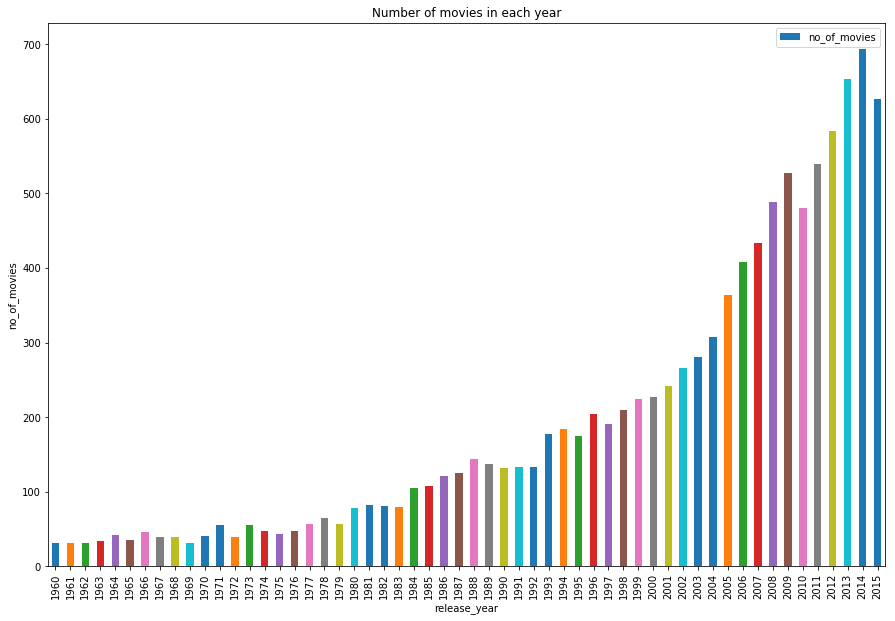

In [40]:
bar_chart(movie_df, 'release_year','no_of_movies','Number of movies in each year', 'no_of_movies')


Number of movies produced eaach year has increased greatly

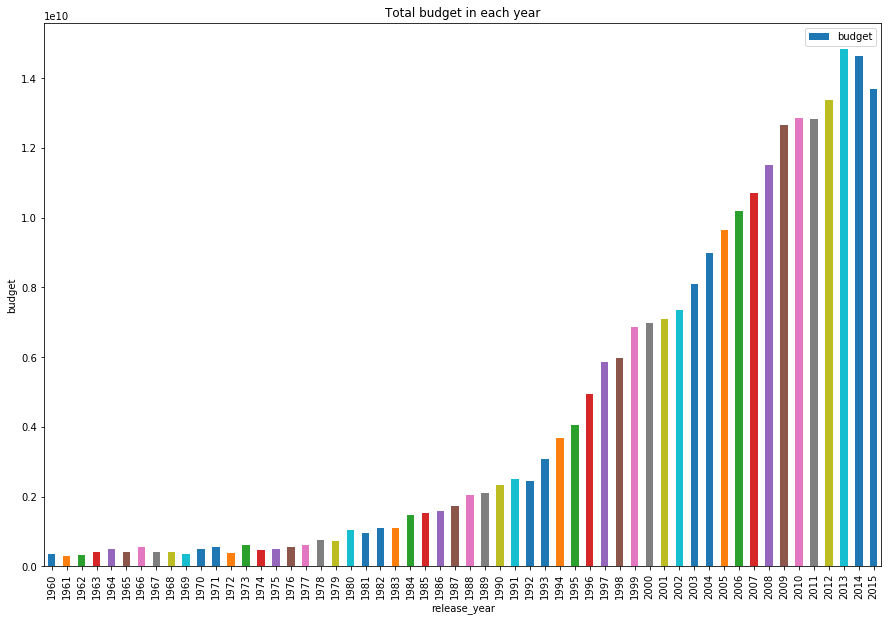

In [41]:
bar_chart(movie_df, 'release_year', 'budget' ,'Total budget in each year', 'budget')

the chart above shows movies have gotten more popular in recent years. Let's check if movie production has increased too and how this popularity has affected the revenue.

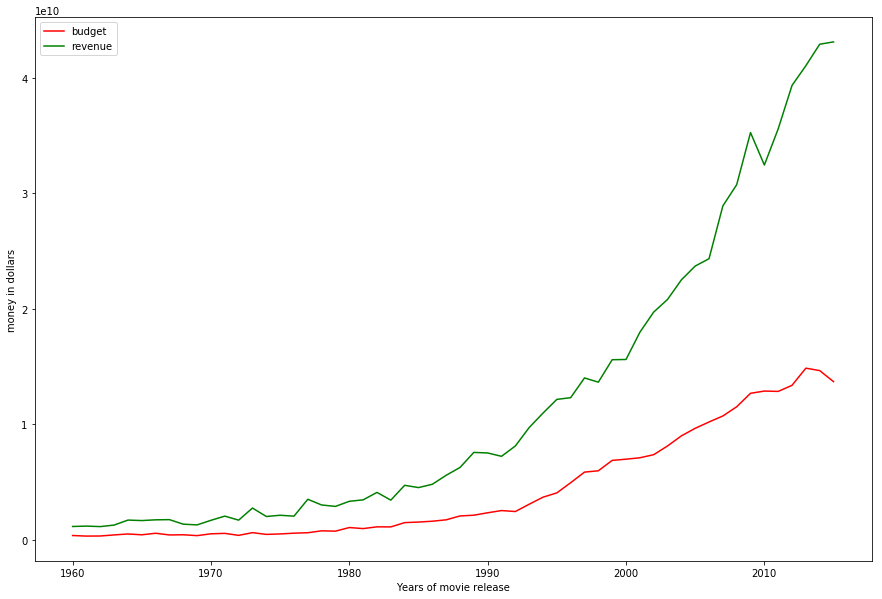

In [42]:
fig=plt.subplots(figsize=(15,10))
x=movie_df.release_year
y1=movie_df.budget
y2=movie_df.revenue
y3=movie_df.popularity
plt.plot(x,y1, color='red', label='budget')
plt.plot(x,y2, color='green', label='revenue')
plt.xlabel('Years of movie release')
plt.ylabel('money in dollars')
plt.legend()

we notice the revenue accrued between years 2000 to 2015 is more than double the budget. Overall they never ran at a loss in any year.Although within the years 1960 and 1970, there are 3 points where revenue was nearly equal to budget. Also spending on movie production has increased alongside revenue.

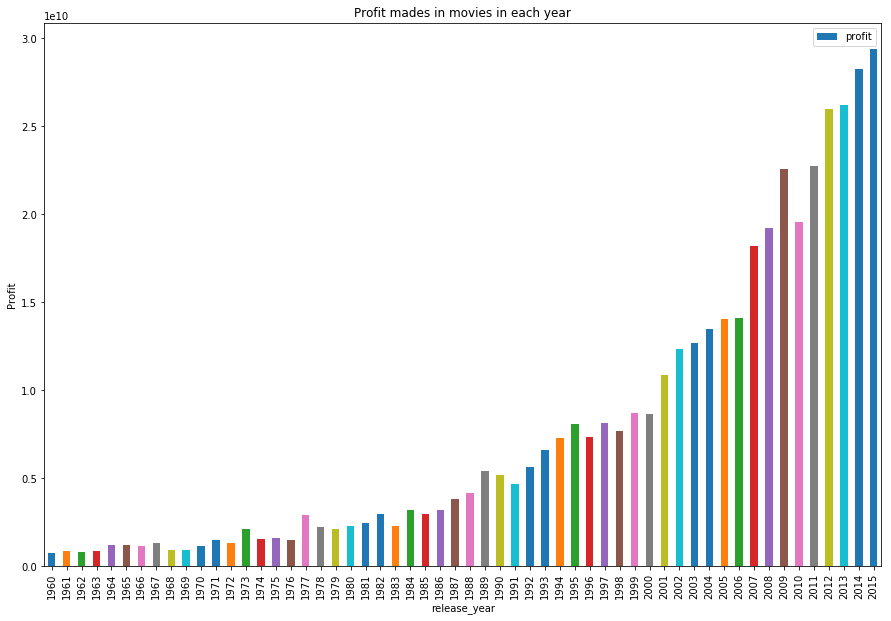

,release_year,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj,no_of_movies,profit
55,2015,647.947523,1.368025e+10,4.309148e+10,182382,3681.5,1.428958e+10,4.568273e+10,626,2.941123e+10


In [43]:
movie_df['profit']=movie_df['revenue']-movie_df['budget']
bar_chart(movie_df, 'release_year', 'profit','Profit mades in movies in each year','Profit')
movie_df[movie_df.profit==movie_df.profit.max()]

In [44]:
movie_df[movie_df.profit==movie_df.profit.min()]

,release_year,popularity,budget,revenue,vote_count,vote_average,budget_adj,revenue_adj,no_of_movies,profit
0,1960,14.685834,3.584155e+08,1.140677e+09,2481,202.4,5.662727e+08,2.353342e+09,32,7.822619e+08


1966 had the least profit and 2015 had the most profit.

### Research Question 2 : Does popularity affect vote_count?

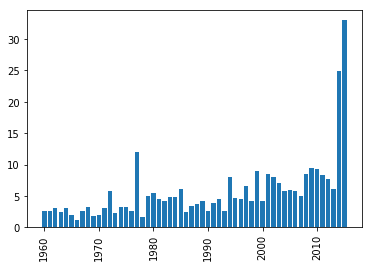

In [45]:

plt.bar(df.release_year, df.popularity)
plt.xticks(rotation=90)
plt.show()

In [46]:
df_pop=movie_df[movie_df.popularity>=movie_df.popularity.mean()]
print(df_pop.shape)
df_pop.head()
df_pop.release_year

(18, 10)


37    1997
38    1998
39    1999
41    2001
42    2002
43    2003
44    2004
45    2005
46    2006
47    2007
48    2008
49    2009
50    2010
51    2011
52    2012
53    2013
54    2014
55    2015
Name: release_year, dtype: int64

Movies have gotten more popular since 1997

Text(0,0.5,'Popularity')

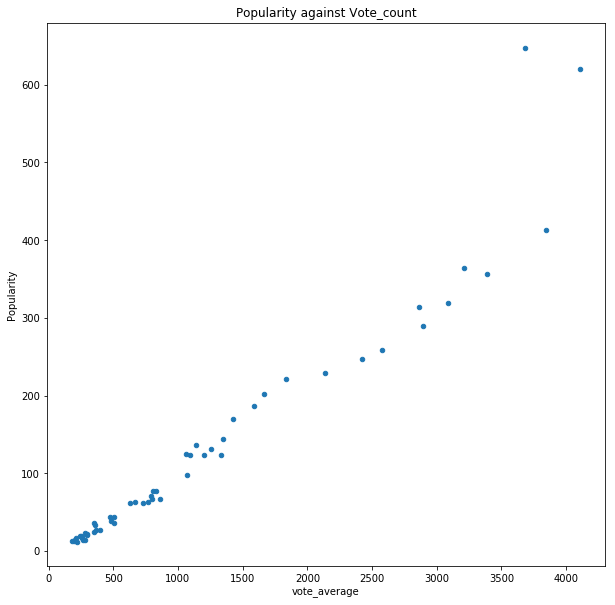

In [47]:
movie_df.plot('vote_average','popularity', kind='scatter', title='Popularity against Vote_count', figsize=(10,10))
plt.ylabel('Popularity')

Text(0,0.5,'Popularity')

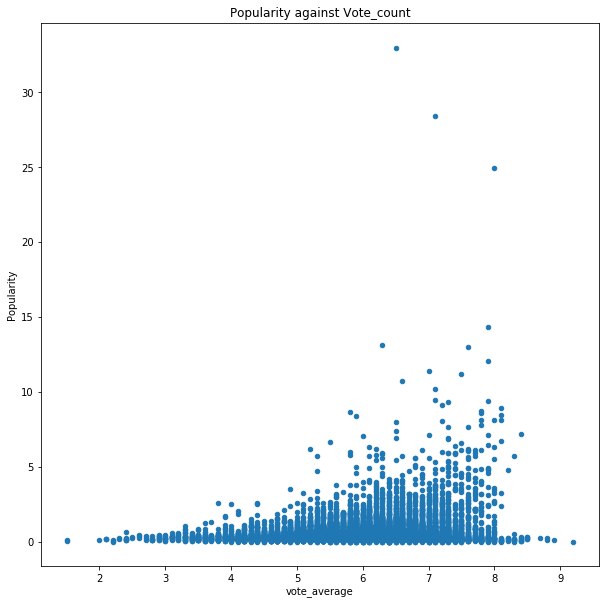

In [48]:
df.plot('vote_average','popularity', kind='scatter', title='Popularity against Vote_count', figsize=(10,10))
plt.ylabel('Popularity')

Movie with more popularity got higher average votes than those with lower popularity

<a id='conclusions'></a>
## Conclusions

There is a trend along the years. An increase in budget, revenue, popularity, vote_count and vote_average. All these columns are directly proportional and affect each other positively. although 2014 produced the most movies it has the second highest profit after 2015. 

Looking further into the years that had the most movie popularity, i noticed that years with low budget didn't get as much popularity as years with higher budgets. This might not mean anything and might just be due to the forward development of technology and its assesibility, and also population growth.

We could look further into the data and check genres that had the highest votes and its correlation to its budget.This wasn't looked into as a movie is classified under various genres. Also, we could check the production companies that had the highest popularity and movie releases and in what years.This can be used to decide what production companies release the best movies and make the most profit if we were to make a movie. 


LIMITATIONS
 i can't say the count of movies is the total number of movies produced in those years but they sure are the ones which gave the most useful data for this dataset. Also there are columns with multiple inputs like genres. Yes a movie can have multiple genres but five is just too many for one movie. I would have liked to see what genres get the most votes and if this popularity has changed over the years. Not to forget we don't know what this vote means whether it's a good rating or a bad rating.


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0